In [ ]:
https://www.youtube.com/watch?v=c0k-YLQGKjY

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
#take every 6th row, i.e, hours one
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


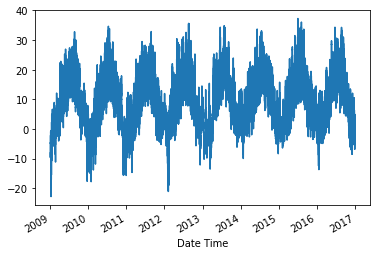

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

In [9]:
!pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 7.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1866/1875 [============================>.] - ETA: 0s - loss: 38.3013 - root_mean_squared_error: 6.1888

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 15s 6ms/step - loss: 38.1490 - root_mean_squared_error: 6.1765 - val_loss: 1.5972 - val_root_mean_squared_error: 1.2638
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 2.7739 - root_mean_squared_error: 1.6655

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 2.7707 - root_mean_squared_error: 1.6646 - val_loss: 0.6809 - val_root_mean_squared_error: 0.8251
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.0134 - root_mean_squared_error: 1.0067

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 1.0133 - root_mean_squared_error: 1.0066 - val_loss: 0.5529 - val_root_mean_squared_error: 0.7436
Epoch 4/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.7571 - root_mean_squared_error: 0.8701

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.7568 - root_mean_squared_error: 0.8699 - val_loss: 0.5298 - val_root_mean_squared_error: 0.7279
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6919 - root_mean_squared_error: 0.8318

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6920 - root_mean_squared_error: 0.8319 - val_loss: 0.5084 - val_root_mean_squared_error: 0.7130
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6674 - root_mean_squared_error: 0.8169

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6678 - root_mean_squared_error: 0.8172 - val_loss: 0.4974 - val_root_mean_squared_error: 0.7053
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6575 - root_mean_squared_error: 0.8109

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6573 - root_mean_squared_error: 0.8107 - val_loss: 0.4930 - val_root_mean_squared_error: 0.7021
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6518 - root_mean_squared_error: 0.8073 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6471 - root_mean_squared_error: 0.8044 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7038
Epoch 10/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6454 - root_mean_squared_error: 0.8034

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6452 - root_mean_squared_error: 0.8032 - val_loss: 0.4921 - val_root_mean_squared_error: 0.7015


In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [17]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-9.999756,-9.67
1,-9.869390,-9.17
2,-8.967695,-8.10
3,-7.489272,-7.66
4,-7.301654,-7.04
...,...,...
59995,6.177782,6.07
59996,7.208103,9.88
59997,12.101384,13.53
59998,15.757482,15.43


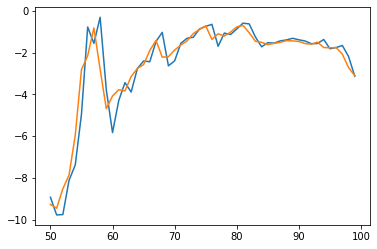

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [21]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,15.460908,14.02
1,13.050062,13.67
2,12.883393,12.27
3,11.353396,11.19
4,10.287962,10.85
...,...,...
4995,17.173985,18.27
4996,17.209946,17.85
4997,16.995636,16.65
4998,15.670590,15.85


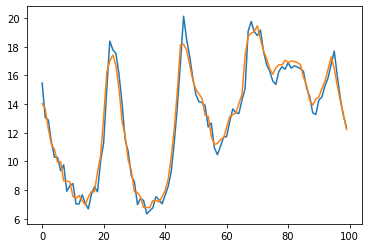

In [22]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [23]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,14.213149,13.99
1,13.070778,13.46
2,12.720951,12.93
3,12.340294,12.43
4,11.915775,12.17
...,...,...
5081,-1.278824,-0.98
5082,-1.541889,-1.40
5083,-1.577371,-2.75
5084,-3.336026,-2.89


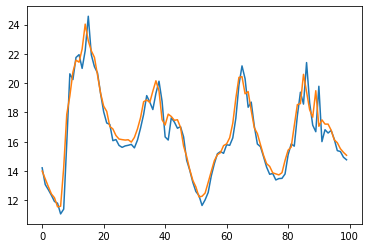

In [24]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [25]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.213149    13.99
 1       13.070778    13.46
 2       12.720951    12.93
 3       12.340294    12.43
 4       11.915775    12.17
 ...           ...      ...
 5081    -1.278824    -0.98
 5082    -1.541889    -1.40
 5083    -1.577371    -2.75
 5084    -3.336026    -2.89
 5085    -3.216140    -3.93
 
 [5086 rows x 2 columns], 0.6600399529233336)

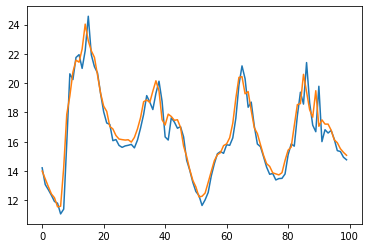

In [26]:
plot_predictions1(model1, X_test1, y_test1)

In [27]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1862/1875 [============================>.] - ETA: 0s - loss: 6.8684 - root_mean_squared_error: 2.6208INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 6.8327 - root_mean_squared_error: 2.6139 - val_loss: 1.1899 - val_root_mean_squared_error: 1.0908
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 1.2237 - root_mean_squared_error: 1.1062INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 1.2222 - root_mean_squared_error: 1.1055 - val_loss: 0.7489 - val_root_mean_squared_error: 0.8654
Epoch 3/10
1855/1875 [============================>.] - ETA: 0s - loss: 0.8417 - root_mean_squared_error: 0.9174INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.8395 - root_mean_squared_error: 0.9162 - val_loss: 0.5634 - val_root_mean_squared_error: 0.7506
Epoch 4/10
1849/1875 [============================>.] - ETA: 0s - loss: 0.7135 - root_mean_squared_error: 0.8447INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.7130 - root_mean_squared_error: 0.8444 - val_loss: 0.5170 - val_root_mean_squared_error: 0.7190
Epoch 5/10
1856/1875 [============================>.] - ETA: 0s - loss: 0.6796 - root_mean_squared_error: 0.8244INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6787 - root_mean_squared_error: 0.8238 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 6/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.6696 - root_mean_squared_error: 0.8183INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6689 - root_mean_squared_error: 0.8179 - val_loss: 0.4985 - val_root_mean_squared_error: 0.7060
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.6677 - root_mean_squared_error: 0.8171INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6679 - root_mean_squared_error: 0.8173 - val_loss: 0.4911 - val_root_mean_squared_error: 0.7008
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6637 - root_mean_squared_error: 0.8147INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6637 - root_mean_squared_error: 0.8147 - val_loss: 0.4900 - val_root_mean_squared_error: 0.7000
Epoch 9/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6648 - root_mean_squared_error: 0.8153INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 5s 3ms/step - loss: 0.6644 - root_mean_squared_error: 0.8151 - val_loss: 0.4889 - val_root_mean_squared_error: 0.6992
Epoch 10/10
1843/1875 [============================>.] - ETA: 0s - loss: 0.6611 - root_mean_squared_error: 0.8131INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


1875/1875 [==============================] - 4s 2ms/step - loss: 0.6616 - root_mean_squared_error: 0.8134 - val_loss: 0.4872 - val_root_mean_squared_error: 0.6980


In [30]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [31]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [32]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1865/1875 [============================>.] - ETA: 0s - loss: 24.3617 - root_mean_squared_error: 4.9358

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 15s 7ms/step - loss: 24.2459 - root_mean_squared_error: 4.9240 - val_loss: 0.9394 - val_root_mean_squared_error: 0.9692
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 1.5596 - root_mean_squared_error: 1.2488

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 1.5588 - root_mean_squared_error: 1.2485 - val_loss: 0.5925 - val_root_mean_squared_error: 0.7697
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.8241 - root_mean_squared_error: 0.9078

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.8235 - root_mean_squared_error: 0.9075 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6978 - root_mean_squared_error: 0.8353 - val_loss: 0.5126 - val_root_mean_squared_error: 0.7160
Epoch 5/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.6660 - root_mean_squared_error: 0.8161

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 6ms/step - loss: 0.6656 - root_mean_squared_error: 0.8159 - val_loss: 0.5053 - val_root_mean_squared_error: 0.7109
Epoch 6/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6534 - root_mean_squared_error: 0.8084

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6533 - root_mean_squared_error: 0.8082 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7016
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6472 - root_mean_squared_error: 0.8045 - val_loss: 0.4971 - val_root_mean_squared_error: 0.7050
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6439 - root_mean_squared_error: 0.8024 - val_loss: 0.4924 - val_root_mean_squared_error: 0.7017
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6416 - root_mean_squared_error: 0.8010 - val_loss: 0.4957 - val_root_mean_squared_error: 0.7041
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6393 - root_mean_squared_error: 0.7995 - val_loss: 0.4923 - val_root_mean_squared_error: 0.7017


In [33]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [34]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [35]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [36]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [37]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [38]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [48]:
y2_train

array([-9.17, -8.1 , -7.66, ..., 15.43, 15.54, 14.02])

In [39]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [40]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [41]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [42]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [43]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 38.6175 - root_mean_squared_error: 6.2143

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 14s 7ms/step - loss: 38.4762 - root_mean_squared_error: 6.2029 - val_loss: 4.1386 - val_root_mean_squared_error: 2.0344
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 4.5848 - root_mean_squared_error: 2.1412

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 4.5835 - root_mean_squared_error: 2.1409 - val_loss: 2.1619 - val_root_mean_squared_error: 1.4703
Epoch 3/10
1861/1875 [============================>.] - ETA: 0s - loss: 2.0781 - root_mean_squared_error: 1.4416

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 2.0724 - root_mean_squared_error: 1.4396 - val_loss: 1.0353 - val_root_mean_squared_error: 1.0175
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.1305 - root_mean_squared_error: 1.0633

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.1305 - root_mean_squared_error: 1.0633 - val_loss: 0.7368 - val_root_mean_squared_error: 0.8584
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.8457 - root_mean_squared_error: 0.9196

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.8453 - root_mean_squared_error: 0.9194 - val_loss: 0.5960 - val_root_mean_squared_error: 0.7720
Epoch 6/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.6740 - root_mean_squared_error: 0.8210

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6731 - root_mean_squared_error: 0.8204 - val_loss: 0.4858 - val_root_mean_squared_error: 0.6970
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.5854 - root_mean_squared_error: 0.7651

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5850 - root_mean_squared_error: 0.7649 - val_loss: 0.4581 - val_root_mean_squared_error: 0.6768
Epoch 8/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.5469 - root_mean_squared_error: 0.7395

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5469 - root_mean_squared_error: 0.7395 - val_loss: 0.4327 - val_root_mean_squared_error: 0.6578
Epoch 9/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.5345 - root_mean_squared_error: 0.7311

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.5343 - root_mean_squared_error: 0.7310 - val_loss: 0.4180 - val_root_mean_squared_error: 0.6465
Epoch 10/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.5290 - root_mean_squared_error: 0.7273

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5292 - root_mean_squared_error: 0.7274 - val_loss: 0.4115 - val_root_mean_squared_error: 0.6415


(      Predictions  Actuals
 0       13.229486    13.46
 1       12.806638    12.93
 2       12.397347    12.43
 3       12.074880    12.17
 4       12.175523    11.55
 ...           ...      ...
 5080    -1.129686    -0.98
 5081    -1.390503    -1.40
 5082    -1.529338    -2.75
 5083    -2.876283    -2.89
 5084    -2.982831    -3.93
 
 [5085 rows x 2 columns], 0.4866857739793002)

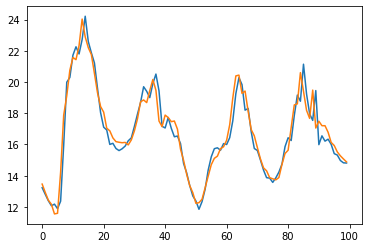

In [44]:
plot_predictions1(model4, X2_test, y2_test)

In [45]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [46]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [49]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [50]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [51]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [52]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [53]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [54]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [55]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [56]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.1593 - root_mean_squared_error: 0.3992

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 19s 9ms/step - loss: 0.1588 - root_mean_squared_error: 0.3985 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0216 - root_mean_squared_error: 0.1470

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0216 - root_mean_squared_error: 0.1469 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0110 - root_mean_squared_error: 0.1047

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0861
Epoch 4/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0884

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0078 - root_mean_squared_error: 0.0883 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 5/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0810

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 6/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0764

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0058 - root_mean_squared_error: 0.0764 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663
Epoch 7/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0738

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.0054 - root_mean_squared_error: 0.0738 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0646
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0724

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0052 - root_mean_squared_error: 0.0724 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 9/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0715

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 12s 7ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0708

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


1875/1875 [==============================] - 13s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617


In [57]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.408686,0.412451,-0.773825,-0.793439
1,0.368686,0.353683,-0.758876,-0.763123
2,0.329206,0.323123,-0.724220,-0.721893
3,0.330046,0.250251,-0.674235,-0.652773
4,0.275273,0.254952,-0.591205,-0.652773
...,...,...,...,...
95,0.686719,0.716869,-0.404815,-0.416310
96,0.650121,0.687485,-0.403471,-0.399333
97,0.636929,0.663978,-0.385891,-0.399333
98,0.643440,0.641646,-0.374459,-0.400546


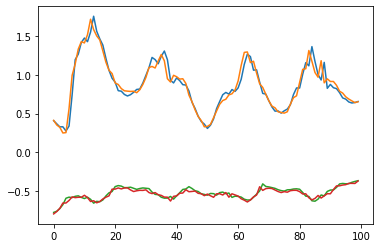

In [58]:
plot_predictions2(model5, X3_test, y3_test)